In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
data = pd.read_csv('../data/memoria_historica/casos_secuestro.csv')
data = data[data['ANNOH'] != 0]
data = data[data['ANNOH'] != 2018]

data.sort_values(by='ANNOH', ascending=False)

,IdCaso,IdCasoRelacionado,DIAH,MESH,ANNOH,REGION,DEPTO_CASO,MUNINICIO_CASO,Modalidad,Modalidad_de_Secuestro,...,DesplazamientoForzado,Extorsion,LesionadosCiviles,Pillaje,Tortura,ViolenciaBasadaGenero,OtroHechoSimultaneo,Total_Civiles,NumeroVictimasCaso,Estado
381,320278,NaN,23,5,2016,Catatumbo,Norte de santander,El tarra,Desconocida,Múltiple,...,0,0,0.0,0,0.0,NaN,NaN,2.0,2,Publicado
30760,443801,NaN,24,8,2016,Catatumbo,Norte de santander,Tibú,Desconocida,Múltiple,...,0,0,0.0,0,0.0,NaN,NaN,0.0,2,Publicado
30762,443803,NaN,5,9,2016,Catatumbo,Norte de santander,El tarra,Desconocida,Individual,...,1,0,0.0,0,0.0,NaN,NaN,1.0,1,Publicado
30580,443610,NaN,29,2,2016,Llanos orientales,Arauca,Arauca,Desconocida,Individual,...,0,0,0.0,0,0.0,NaN,NaN,1.0,1,Publicado
25227,353642,Cr013079,3,2,2016,Nordeste antioqueño,Antioquia,Segovia,Retén,Individual,...,0,0,0.0,0,0.0,NaN,NaN,1.0,1,Publicado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26859,356635,Cr044163,0,0,1960,Provincia de velez,Santander,Vélez,Desconocida,Colectivo,...,0,0,0.0,0,0.0,NaN,NaN,4.0,4,Publicado
27038,356961,Cr044155,29,5,1960,Sur del valle,Valle del cauca,El cerrito,Asalto,Colectivo,...,0,0,0.0,1,0.0,NaN,NaN,7.0,7,Publicado
30813,443860,Cr008538,0,12,1959,Occidente antioqueño,Antioquia,Ebéjico,Asalto,Individual,...,0,0,0.0,0,0.0,NaN,NaN,1.0,1,Publicado
868,321401,Cr008501,0,3,1958,Eje cafetero,Quindio,Córdoba,Desconocida,Individual,...,0,0,0.0,0,0.0,NaN,NaN,1.0,1,Publicado


## Agrupar por departamento y año (1958 - 2016)

In [250]:
df = data.groupby(['DEPTO_CASO', 'ANNOH']).agg({'DEPTO_CASO': 'count'})
df.columns = ['casos']
df = df.reset_index()
df.sort_values(by='ANNOH', ascending=False)
df = df.dropna(axis=1, how='all')
df.head()

,DEPTO_CASO,ANNOH,casos
0,Amazonas,1997,1
1,Amazonas,1998,3
2,Amazonas,2001,1
3,Amazonas,2002,1
4,Antioquia,1959,1


#### Eliminar departamentos con muy pocos datos

In [251]:
deptos = df['DEPTO_CASO'].unique()

years_per_depto = {}

for depto in deptos:
    years_per_depto[depto] = 0
    for year in range(1958, 2016 + 1):
        if ((df['DEPTO_CASO'] == depto) & (df['ANNOH'] == year)).any():
            years_per_depto[depto] += 1
print(years_per_depto)

{'Amazonas': 4, 'Antioquia': 49, 'Arauca': 36, 'Archipiélago de san andrés, providencia y santa catalina': 1, 'Atlántico': 25, 'Bogotá, d.c.': 39, 'Bolívar': 38, 'Boyacá': 39, 'Caldas': 34, 'Caquetá': 40, 'Casanare': 31, 'Cauca': 41, 'Cesar': 37, 'Chocó': 32, 'Cundinamarca': 34, 'Córdoba': 40, 'Exterior': 12, 'Guainía': 11, 'Guaviare': 33, 'Huila': 46, 'La guajira': 27, 'Magdalena': 29, 'Meta': 40, 'Nariño': 29, 'Norte de santander': 37, 'Putumayo': 32, 'Quindio': 24, 'Risaralda': 32, 'Santander': 42, 'Sin informacion': 41, 'Sucre': 30, 'Tolima': 45, 'Valle del cauca': 48, 'Vaupés': 10, 'Vichada': 25}


In [252]:
excluded_deptos = [
    'Sin informacion', 
    'Exterior',
    'Amazonas',
    'Guainía',
    'Archipiélago de san andrés, providencia y santa catalina',
    'Vaupés',    
]

df = df[~df['DEPTO_CASO'].isin(excluded_deptos)]
print("{0} deptos permanecen".format(len(df['DEPTO_CASO'].unique())))
df.head()

29 deptos permanecen


,DEPTO_CASO,ANNOH,casos
4,Antioquia,1959,1
5,Antioquia,1965,2
6,Antioquia,1970,6
7,Antioquia,1971,2
8,Antioquia,1972,2


#### Completar datos en el periodo (1958 - 2016)  [LOCF]

In [253]:
deptos = df['DEPTO_CASO'].unique()
lo_depto = {depto:0 for depto in deptos}

fill_df_columns = ['DEPTO_CASO', 'ANNOH', 'casos']
fill_df_data = []

for depto in deptos:
    for year in range(1958, 2016 + 1):
        if not ((df['DEPTO_CASO'] == depto) & (df['ANNOH'] == year)).any():
            locf = lo_depto[depto]
            fill_df_data.append([depto, year, locf])
        else:
            lo_depto[depto] = df[(df['DEPTO_CASO'] == depto) & (df['ANNOH'] == year)]['casos'].iloc[0]

fill_df = pd.DataFrame(fill_df_data, columns=fill_df_columns)

In [254]:
complete_df = pd.concat([df, fill_df], ignore_index=True)
complete_df.sort_values(by=['DEPTO_CASO', 'ANNOH'], inplace=True)
complete_df

,DEPTO_CASO,ANNOH,casos
1034,Antioquia,1958,0
0,Antioquia,1959,1
1035,Antioquia,1960,1
1036,Antioquia,1961,1
1037,Antioquia,1962,1
...,...,...,...
1032,Vichada,2012,3
1033,Vichada,2013,1
1708,Vichada,2014,1
1709,Vichada,2015,1


#### Representar serie de tiempo para tslearn

In [255]:
ts_series = complete_df.groupby('DEPTO_CASO').agg(list)['casos']
ts_series.head()

DEPTO_CASO
Antioquia       [0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 6, 2, 2, ...
Arauca          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Atlántico       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Bogotá, d.c.    [0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 2, 2, 1, ...
Bolívar         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, ...
Name: casos, dtype: object

In [256]:
labels = ts_series.to_frame().index.to_list()

### Visualizar series de tiempo

<AxesSubplot:xlabel='año', ylabel='numero casos'>

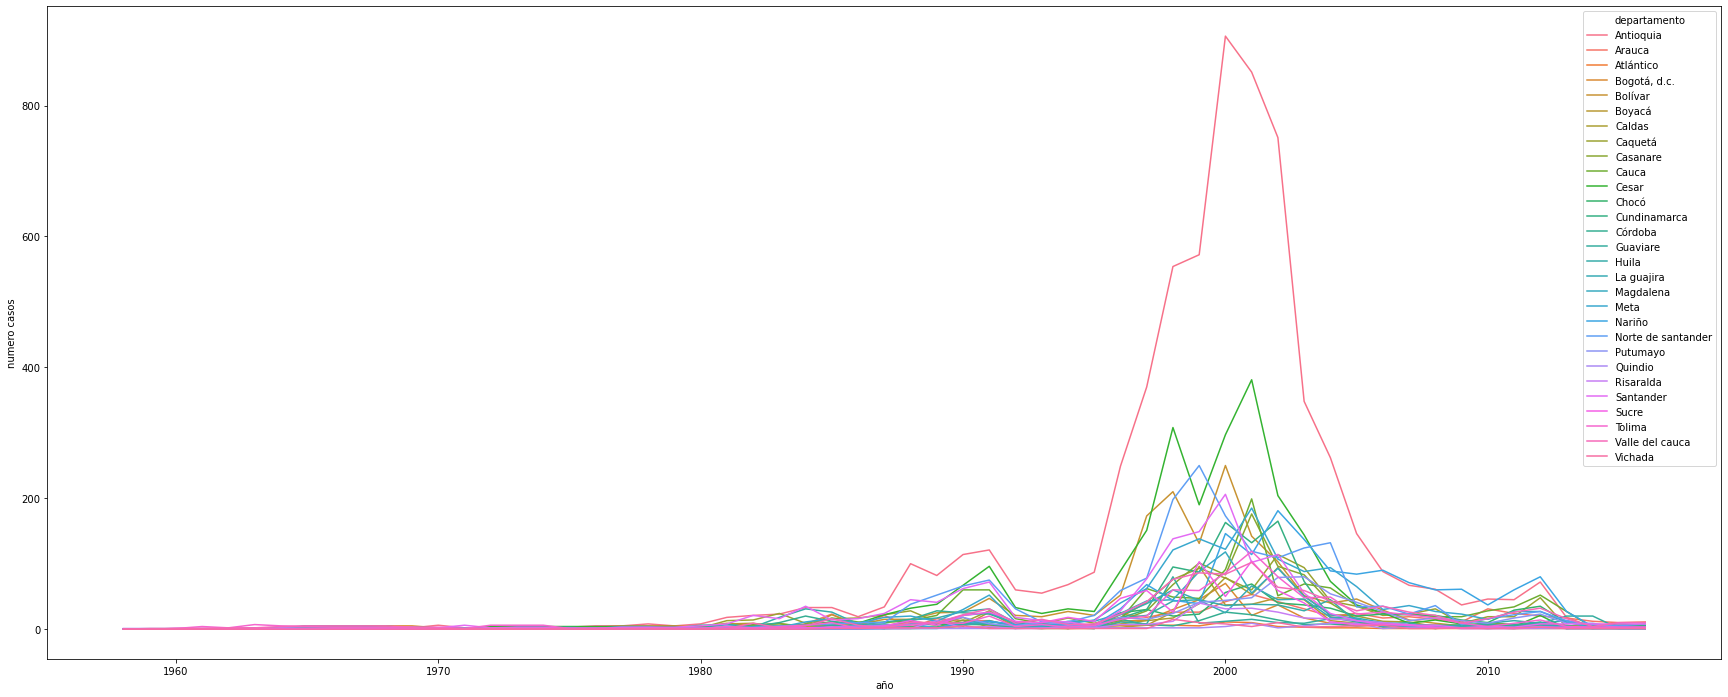

In [257]:
import seaborn as sns
temp = complete_df.groupby('DEPTO_CASO').agg(list)['casos'].to_frame()

unnested_ts_data = []
unnested_ts_columns = ['departamento', 'año', 'numero casos']

for label in labels:
    year = 1958
    for point in temp.loc[label]['casos']:
        unnested_ts_data.append([label, year, point])
        year += 1

ts_df = pd.DataFrame(unnested_ts_data, columns=unnested_ts_columns)

dims = (30, 12)
fig, ax = plt.subplots(figsize=dims)        
sns.lineplot(ax=ax, data=ts_df, x='año' , y='numero casos', hue='departamento')

#### Scale ts

In [258]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

ts = to_time_series_dataset(ts_series)
ts_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(ts)
print(ts.shape)

(29, 59, 1)


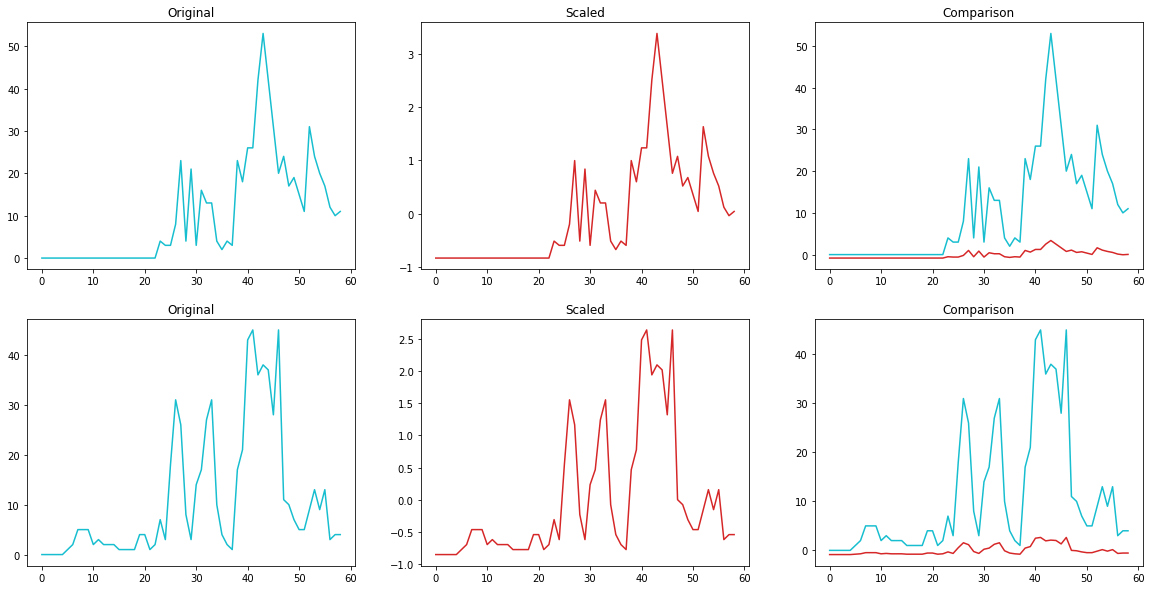

In [259]:
examples = [1, 15]
n_examples = len(examples)

plt.figure(figsize=(20, 5 * n_examples))

for i in range(len(examples)):    
    example = examples[i]
    plt.subplot(n_examples, 3, 3 * i + 1)
    plt.plot(ts[example].ravel(), '#17becf')
    plt.title('Original')

    plt.subplot(n_examples, 3, 3 * i + 2)
    plt.plot(ts_scaled[example].ravel(), '#d62728')
    plt.title('Scaled')

    plt.subplot(n_examples, 3, 3 * i + 3)
    plt.plot(ts[example].ravel(), '#17becf')
    plt.plot(ts_scaled[example].ravel(), '#d62728')
    plt.title('Comparison')

### Clustering - selección del modelo (ts_scaled)

In [260]:
n_clusters = 5
n_methods = 5
seed = 10
dims = (50, 30)
sz = ts_scaled.shape[1]

In [261]:
def plot_ts(ts, model, cluster, cluster_labels):
    
    for i in range(len(cluster_labels)):
        if cluster_labels[i] == cluster:
            plt.plot(ts[i].ravel(), 'k-', alpha=.3, )

    if hasattr(model, 'cluster_centers_'):
        plt.plot(model.cluster_centers_[cluster].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-1, 7)
    plt.text(0.55, 0.85,'Cluster %d' % (cluster + 1), transform=plt.gca().transAxes)

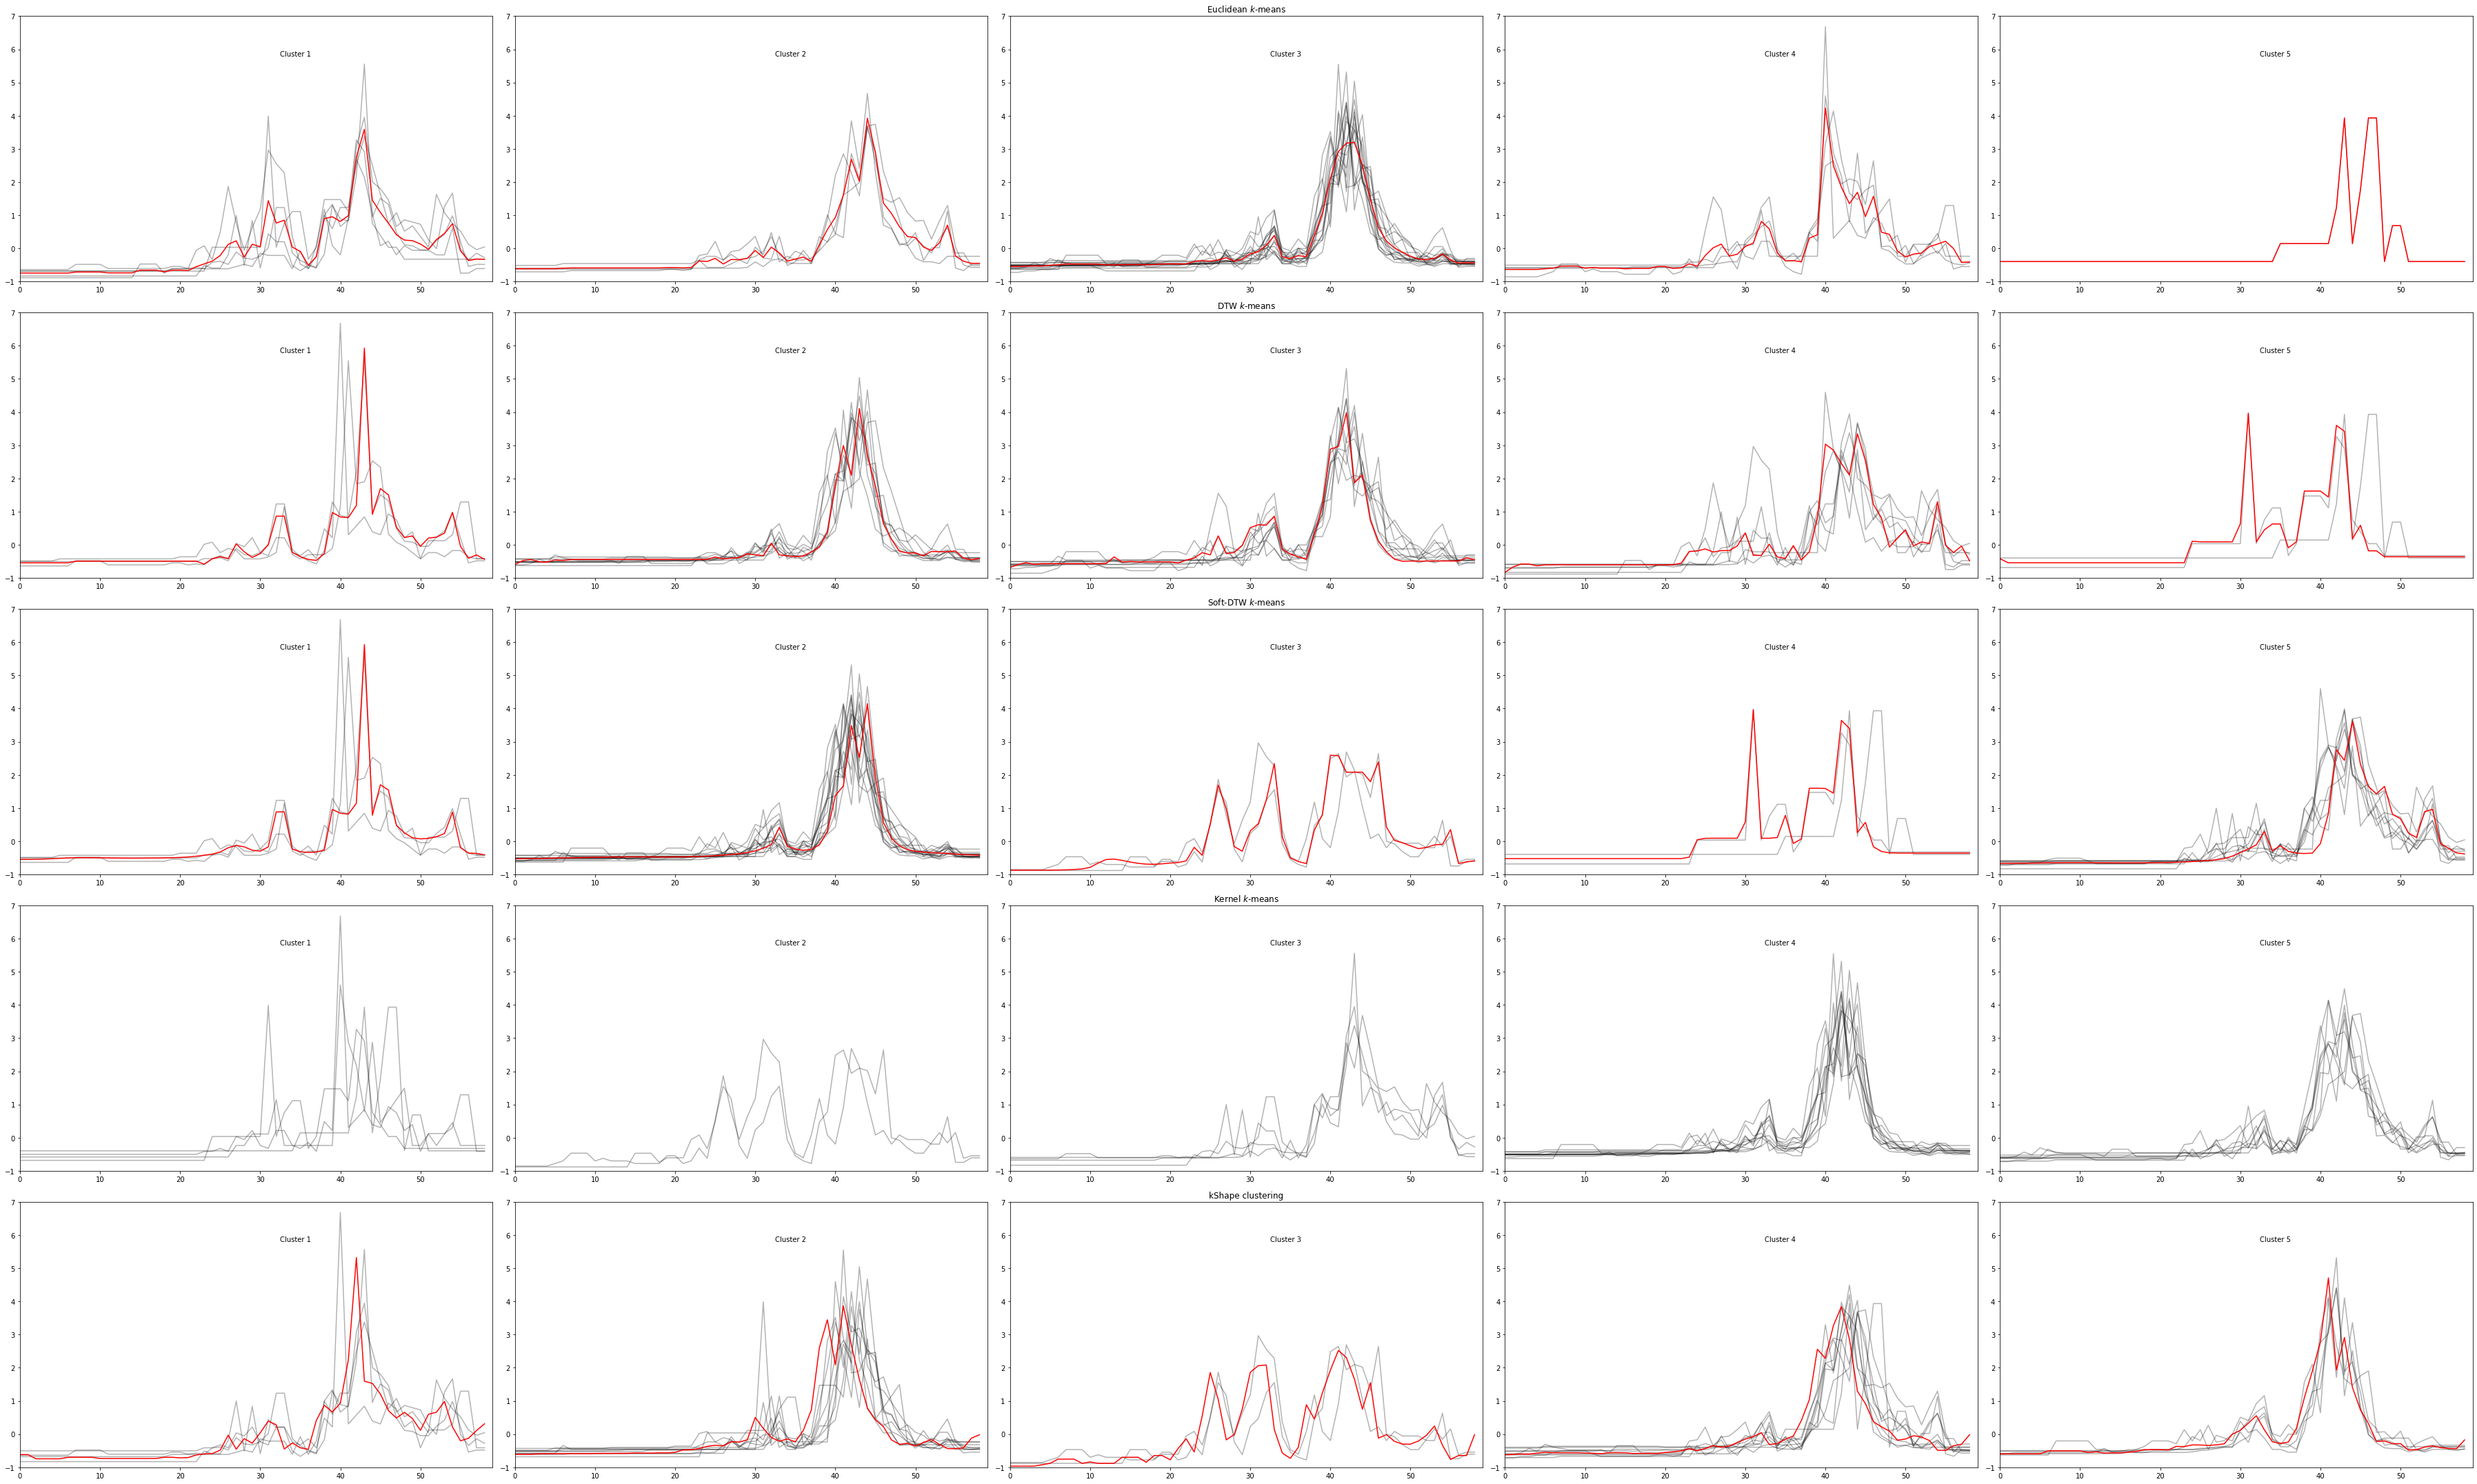

In [262]:
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans, KShape

# Euclidean k-means
eu_km = TimeSeriesKMeans(n_clusters=n_clusters, 
                         random_state=seed)
eu_labels = eu_km.fit_predict(ts_scaled).tolist()

plt.figure(figsize=dims)

for yi in range(n_clusters):
    plt.subplot(n_methods, n_clusters, yi + 1)    
    plot_ts(ts_scaled, eu_km, yi, eu_labels)
    if yi == 2:
        plt.title("Euclidean $k$-means")


# DTW k-means
dtw_km = TimeSeriesKMeans(n_clusters=n_clusters, 
                          metric="dtw", 
                          random_state=seed)
dtw_labels = dtw_km.fit_predict(ts_scaled)

for yi in range(n_clusters):
    plt.subplot(n_methods, n_clusters, 1 * n_clusters + yi + 1)    
    plot_ts(ts_scaled, dtw_km, yi, dtw_labels)
    if yi == 2:
        plt.title("DTW $k$-means")
        

# Soft-DTW k-means
soft_dtw_km = TimeSeriesKMeans(n_clusters=n_clusters,
                               metric="softdtw",
                               random_state=seed,
                               metric_params={"gamma": .1})
soft_dtw_labels = soft_dtw_km.fit_predict(ts_scaled)

for yi in range(n_clusters):
    plt.subplot(n_methods, n_clusters, 2 * n_clusters + yi + 1)    
    plot_ts(ts_scaled, soft_dtw_km, yi, soft_dtw_labels)
    if yi == 2:
        plt.title("Soft-DTW $k$-means")


# KernelKMeans
gak_km = KernelKMeans(n_clusters=n_clusters,
                      kernel="gak", 
                      kernel_params={"sigma": "auto"},
                      n_init=20,
                      random_state=seed)
gak_labels = gak_km.fit_predict(ts_scaled)

for yi in range(n_clusters):
    plt.subplot(n_methods, n_clusters, 3 * n_clusters + yi + 1)    
    plot_ts(ts_scaled, gak_km, yi, gak_labels)
    if yi == 2:
        plt.title("Kernel $k$-means")


# kShape clustering
ks = KShape(n_clusters=n_clusters, random_state=seed)
ks_labels = ks.fit_predict(ts_scaled)

for yi in range(n_clusters):
    plt.subplot(n_methods, n_clusters, 4 * n_clusters + yi + 1)    
    plot_ts(ts_scaled, ks, yi, ks_labels)
    if yi == 2:
        plt.title("kShape clustering")

plt.tight_layout()
plt.show()

In [263]:
from tslearn.clustering import silhouette_score

metrics_cols = ['Model', 'silhouette_score(ts_scaled)']
metrics_vals = []

metrics_vals.append(['Euclidean k-means', silhouette_score(ts_scaled, eu_labels)])
metrics_vals.append(['DTW k-means', silhouette_score(ts_scaled, dtw_labels)])
metrics_vals.append(['Soft-DTW k-means', silhouette_score(ts_scaled, soft_dtw_labels)])
metrics_vals.append(['KernelKMeans', silhouette_score(ts_scaled, gak_labels)])
metrics_vals.append(['kShape clustering', silhouette_score(ts_scaled, ks_labels)])

df_metrics = pd.DataFrame(metrics_vals, columns=metrics_cols)
df_metrics

,Model,silhouette_score(ts_scaled)
0,Euclidean k-means,-0.048658
1,DTW k-means,0.052241
2,Soft-DTW k-means,0.134938
3,KernelKMeans,0.023606
4,kShape clustering,0.002240


### Clustering (Soft-DTW K-means). Selección del número de clusters

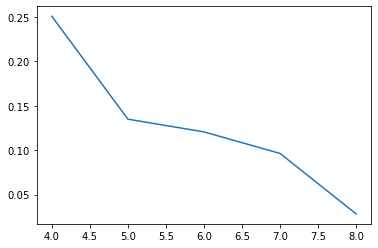

In [264]:
scores = []
k_vals = [x for x in range(4, 9)]

for k in k_vals:    
    km_k = TimeSeriesKMeans(n_clusters=k,
                               metric="softdtw",
                               random_state=seed,
                               metric_params={"gamma": 0.1})

    labels_k = km_k.fit_predict(ts_scaled)        
    scores.append(silhouette_score(ts_scaled, labels_k))
    

plt.plot(k_vals, scores)

### Clustering (Soft-DTW K-means, K = 5)

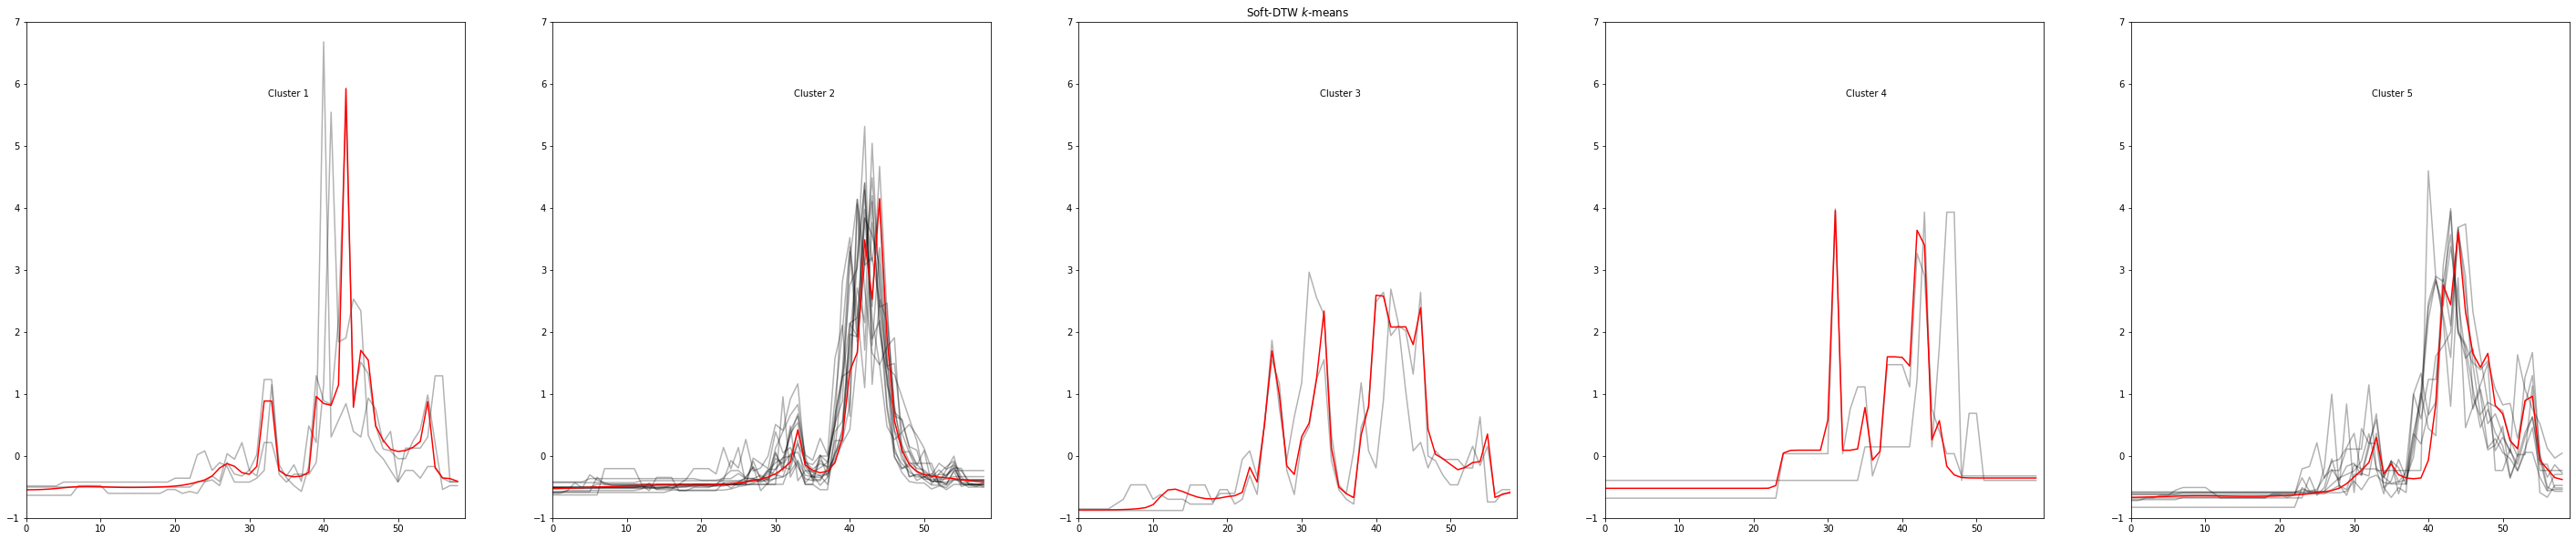

In [265]:
plt.figure(figsize=(50, 10))


soft_dtw_km = TimeSeriesKMeans(n_clusters=n_clusters,
                               metric="softdtw",
                               random_state=seed,
                               metric_params={"gamma": 0.1})
soft_dtw_labels = soft_dtw_km.fit_predict(ts_scaled)

for yi in range(n_clusters):
    plt.subplot(1, n_clusters, yi + 1)    
    plot_ts(ts_scaled, soft_dtw_km, yi, soft_dtw_labels)
    if yi == 2:
        plt.title("Soft-DTW $k$-means")

### Departamentos por cluster

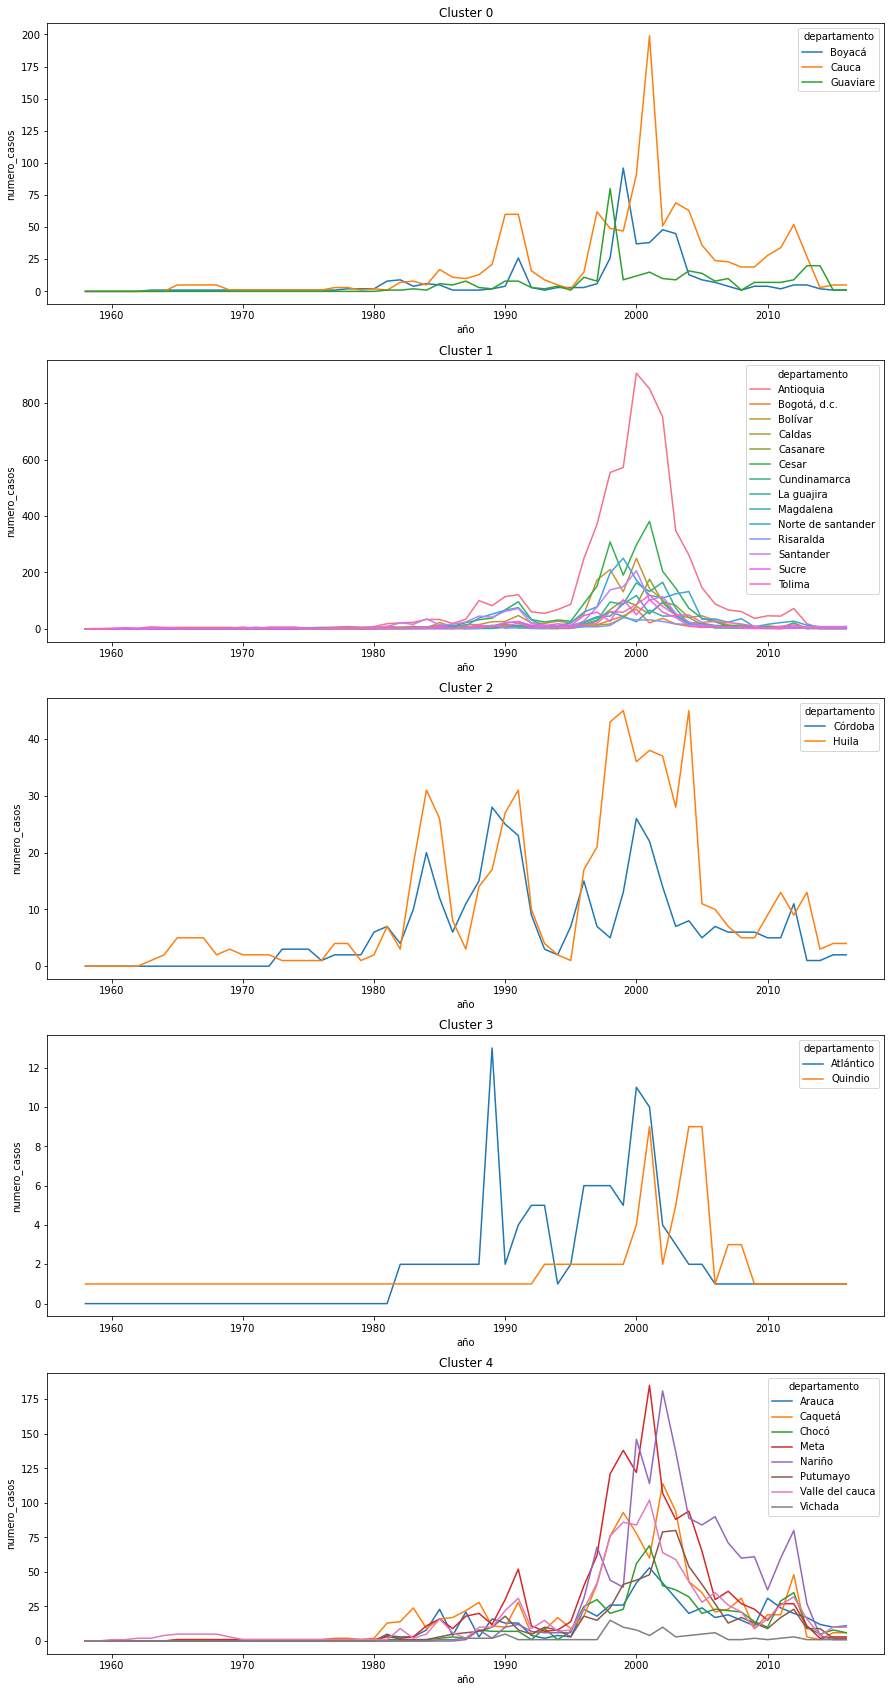

In [272]:
cluster_labels = soft_dtw_labels
deptos_names = labels

fig, axes = plt.subplots(n_clusters, 1, figsize=(15, 30))

for yi in range(n_clusters):
#     plt.subplot(n_clusters, 1, yi + 1)
    
    plot_data = []
    plot_columns = ['departamento', 'año', 'numero_casos']  
    
    for i in range(len(cluster_labels)):        
        if cluster_labels[i] == yi:            
            depto = deptos_names[i]            
            year = 1958
            for ts_value in ts[i].ravel():
                plot_data.append([depto, year, ts_value])
                year += 1
        
    plot_df = pd.DataFrame(plot_data, columns=plot_columns)
    sns.lineplot(ax=axes[yi], data=plot_df, x='año', y='numero_casos', hue='departamento').set_title('Cluster {0}'.format(yi))

In [267]:
import geopandas as gpd

colombia = gpd.read_file('../data/GADM/gadm36_COL_1.shp', encoding='utf-8')
colombia.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,COL,Colombia,COL.1_1,Amazonas,None,None,Comisaría,Commissiary,None,CO.AM,"MULTIPOLYGON (((-69.43138 -1.07847, -69.42712 ..."
1,COL,Colombia,COL.2_1,Antioquia,None,None,Departamento,Department,None,CO.AN,"MULTIPOLYGON (((-76.99986 8.99986, -77.00014 8..."
2,COL,Colombia,COL.3_1,Arauca,None,None,Intendencia,Intendancy,None,CO.AR,"POLYGON ((-69.92316 6.05792, -69.92910 6.06720..."
3,COL,Colombia,COL.4_1,Atlántico,None,None,Departamento,Department,None,CO.AT,"POLYGON ((-74.88160 10.34100, -74.88670 10.329..."
4,COL,Colombia,COL.5_1,Bolívar,None,None,Departamento,Department,None,CO.BL,"MULTIPOLYGON (((-75.79681 10.16792, -75.79681 ..."


In [268]:
depto_names = labels.copy()

for depto in depto_names:
    if depto not in colombia.NAME_1.unique():
        print(depto)

print('*' * 80)
print(depto_names)
print('*' * 80)
print(colombia.NAME_1.unique())

Bogotá, d.c.
La guajira
Norte de santander
Quindio
Valle del cauca
********************************************************************************
['Antioquia', 'Arauca', 'Atlántico', 'Bogotá, d.c.', 'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar', 'Chocó', 'Cundinamarca', 'Córdoba', 'Guaviare', 'Huila', 'La guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de santander', 'Putumayo', 'Quindio', 'Risaralda', 'Santander', 'Sucre', 'Tolima', 'Valle del cauca', 'Vichada']
********************************************************************************
['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Córdoba' 'Cundinamarca'
 'Guainía' 'Guaviare' 'Huila' 'La Guajira' 'Magdalena' 'Meta' 'Nariño'
 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda'
 'San Andrés y Providencia' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca'
 'Vaupés' 'Vichada']


In [269]:
depto_names[depto_names.index('Bogotá, d.c.')] = 'Cundinamarca'
depto_names[depto_names.index('La guajira')] ='La Guajira'
depto_names[depto_names.index('Norte de santander')] = 'Norte de Santander'
depto_names[depto_names.index('Quindio')] = 'Quindío'
depto_names[depto_names.index('Valle del cauca')] = 'Valle del Cauca'

for depto in depto_names:
    if depto not in colombia.NAME_1.unique():
        print(depto)

In [270]:
depto_cluster = [[depto_names[i], cluster_labels[i]] for i in range(len(cluster_labels))]

depto_cluster_df = pd.DataFrame(depto_cluster, columns=['NAME_1', 'cluster'])
depto_cluster_df.drop_duplicates()

colombia = colombia.merge(depto_cluster_df, left_on=['NAME_1'], right_on=['NAME_1'], how='left')

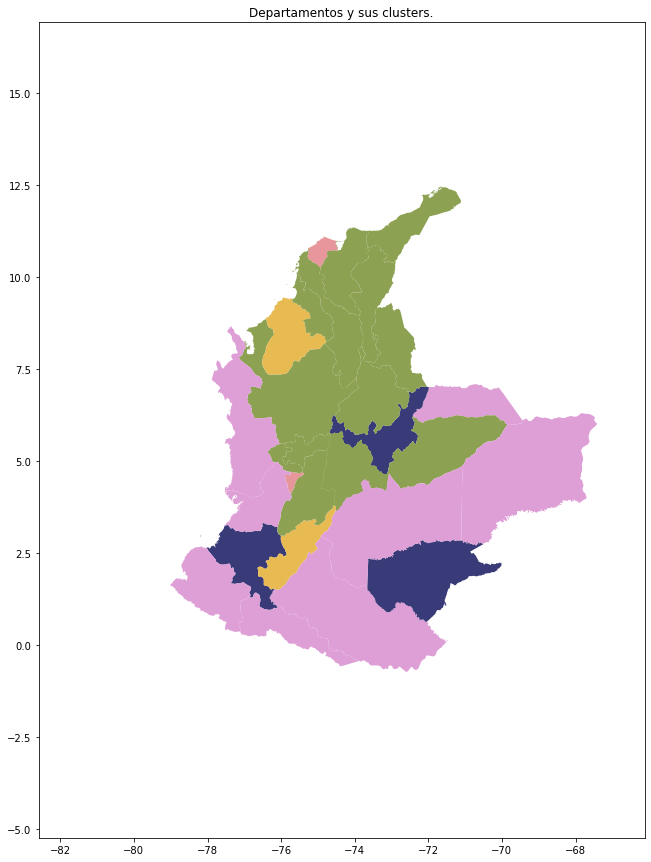

In [311]:
colombia.plot(column='cluster', cmap='tab20b', figsize=(18,15));
plt.title('Departamentos y sus clusters.');